In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

# Tight-binding model of 1d chain

## Introduction
This notebook is intended to give a very basic example to the band structure calculation, with the model of one-dimensional atom chains.


One can write the Hamiltonian by projecting to lattice A and B: 
$$H_1^{ab}=\langle \psi_A | H_1 | \psi_B \rangle = t $$
$$H_2^{ab}=\langle \psi_A | H_2 | \psi_B \rangle = t' $$
$$H = H_1 + H_2$$
Under such projection, the Hamiltonian is thus converted into a form of 2x2 matrices.

With the Bloch functions, the intercell hopping is then:
$$H_2^{ab}=\langle \psi_A | H_2 | \exp(-ik) \psi_B \rangle =t' \exp(-ik)$$
we write the Hamiltonian matrix in terms of wavevector k:
$$H_{00}=\left(\begin{array}{cc}
0 & t\\
t & 0
\end{array}\right)$$
$$H_{01}=\left(\begin{array}{cc}
0 & t' \exp(ik)\\
0 & 0
\end{array}\right)$$
$$H_{10}=\left(\begin{array}{cc}
0 & 0\\
t'\exp(-ik) & 0
\end{array}\right)$$

The whole Hamiltonian matrix writes:
$$H(k)=H_{00}+H_{01}+H_{10}=\left(\begin{array}{cc}
0 & t+t' \exp(ik)\\
t+t'\exp(-ik) & 0
\end{array}\right)$$

In order to calculate the bands, one should diagonalize the Hamiltonian $H(k)$ for each point of $k$. That's to solve the quadratic equation:
$$ \lambda ^2 = (t + t'\cos(k))^2 + (t'\sin(k))^2$$
and the answer is :
$$\lambda=\pm \sqrt{(t + t'\cos(k))^2 + (t'\sin(k))^2}$$

Text(0.5, 1.0, 'an illustration of the 1D chain')

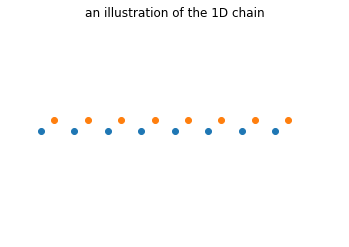

In [2]:
x=np.linspace(1,8,8)
y = np.zeros(8)
plt.ylim(-1,1)
plt.plot(x, y, 'o')
plt.plot(x+0.4, y+0.1, 'o')
plt.axis([0,10,-1,1])

#plt.axis('equal')
plt.axis('off')
plt.title('an illustration of the 1D chain')

In [3]:
def interactive_1dband(t,t1,nk):
    k=np.linspace(-1.0*np.pi,1.0*np.pi,nk)
    b1=-np.sqrt((t+t1*np.cos(k))**2+(t1*np.sin(k))**2)
    b2=-b1
    plt.scatter(k,b1)
    plt.plot(k,b2)

In [5]:
interact(interactive_1dband,t=(0.5,1.5),t1=(0.5,1.5),nk=(5,100))

interactive(children=(FloatSlider(value=1.0, description='t', max=1.5, min=0.5), FloatSlider(value=1.0, descri…

<function __main__.interactive_1dband(t, t1, nk)>

We show the Hamiltonian in finite 1D chain

In [64]:
def buildham(t,t1,nq):
    part1=np.array([[0.0, 1.0], [0.0, 0.0]])
    part2=np.array([[0.0,0.0],  [1.0,0.0]])
    y=np.ones(nq)

    mat1=np.diag(y,-1)*t+np.diag(y,1)*t1
    mat1[nq,0]=t1
    mat1[0,nq]=t
    mat2=np.transpose(mat1)

    mat=np.kron(part1,mat1)+np.kron(part2,mat2)
    #print(mat)